# Exercise 3: Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file.

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs
* Make processing plan
* Develop code that works with a sample
* Adjust the code to work with Big data
* Test big data approach on a sample
* Run program with big data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
searches = './searches.csv.bz2'

Primero vamos a crear un sample con la línea de comandos, como lo hicimos con el archivo booking de ejercicios anteriores.

In [3]:
! bzcat searches.csv.bz2 | head -100000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [4]:
!bzip2 -f searches.sample.csv

In [5]:
ls -l

total 475684
-rw-rw-rw- 1 pipe11 pipe11     13415 Jan 13 13:07  01_ADSC_Exercise1.ipynb
-rw-rw-rw- 1 pipe11 pipe11    205272 Jan 13 13:23  02_ADSC_Exercise2.ipynb
-rw-rw-rw- 1 pipe11 pipe11      6701 Jan 13 18:43  03_ADSC_Exercise3.ipynb
-rw-rw-rw- 1 pipe11 pipe11     40571 Jan 13 13:26  05_ADSC_Exercise3.ipynb
-rw-rw-rw- 1 pipe11 pipe11    212435 Jan 13 16:01  06_intro_to_pandas_practical.ipynb
-rw-rw-rw- 1 pipe11 pipe11    301678 Jan 13 18:42 'Amadeus Challenge Inclass.ipynb'
-rw-rw-rw- 1 pipe11 pipe11    535893 Jan 11 09:30  bookings.sample.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11 483188920 Jan 11 09:20  searches.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11   2432065 Jan 13 18:44  searches.sample.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11     77878 Jan 11 13:34  top_airports.csv


In [6]:
sample_searches = pd.read_csv('searches.sample.csv.bz2', sep = '^', nrows = 99999)

In [8]:
pd.set_option('display.max_columns', None)
sample_searches.sample(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
54111,2013-02-24,04:56:29,FFP,9530f0a7e694bc9402885b4fa7e094bd,TR,AMM,GVA,1,2,AMM,GVA,2013-04-16,EU,NaN,GVA,AMM,2013-04-23,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,IST
31141,2013-02-01,15:08:28,MPT,f8fd42c66043e6c2fd79962f65868352,FI,HEL,LON,1,2,HEL,LON,2013-08-02,NaN,NaN,LON,HEL,2013-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL
88290,2013-03-30,17:05:19,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,FOR,FLN,0,1,FOR,FLN,2013-05-17,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
84674,2013-03-26,13:06:24,MPT,9aa4c769608174fd5561f314ae59221c,SE,GOT,NYC,1,3,GOT,NYC,2014-03-08,NaN,NaN,NYC,SFO,2014-03-12,NaN,NaN,SFO,GOT,2014-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
98980,2013-04-09,19:47:41,MPT,256aefe3f5c58171e817ff2276a479f7,IT,TPS,PEG,1,2,TPS,PEG,2013-06-23,NaN,NaN,PEG,TPS,2013-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
34245,2013-02-04,14:42:11,MPT,9c3131cfd29c41358299f0b75aa8425b,IT,BLQ,LMP,1,2,BLQ,LMP,2013-04-24,NaN,NaN,LMP,BLQ,2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
49645,2013-02-19,06:38:29,MPT,440642a9bdaeb6287f826cefd73255e8,US,CGK,ICN,0,1,CGK,ICN,2013-03-23,MK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
67961,2013-03-09,19:31:40,MPT,440642a9bdaeb6287f826cefd73255e8,US,SAN,LIM,1,2,SAN,LIM,2013-05-15,VK,NaN,LIM,SAN,2013-05-22,VK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
72654,2013-03-14,15:51:29,MPT,440642a9bdaeb6287f826cefd73255e8,US,BNA,PVG,0,1,BNA,PVG,2013-05-15,FK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
74409,2013-03-16,13:10:13,MPT,57a5ef0a40c8427bf13013630dc355c6,GB,LON,LAX,1,2,LON,LAX,2013-03-23,NaN,NaN,LAX,LON,2013-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON


In [9]:
sample_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 45 columns):
Date                 99999 non-null object
Time                 99999 non-null object
TxnCode              99999 non-null object
OfficeID             99999 non-null object
Country              99984 non-null object
Origin               99999 non-null object
Destination          99999 non-null object
RoundTrip            99999 non-null int64
NbSegments           99999 non-null int64
Seg1Departure        99999 non-null object
Seg1Arrival          99999 non-null object
Seg1Date             99604 non-null object
Seg1Carrier          37841 non-null object
Seg1BookingCode      10777 non-null object
Seg2Departure        72140 non-null object
Seg2Arrival          72140 non-null object
Seg2Date             71677 non-null object
Seg2Carrier          26819 non-null object
Seg2BookingCode      9272 non-null object
Seg3Departure        5174 non-null object
Seg3Arrival          5174 non-null 

In [10]:
sample_searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,99999.000000,99999.000000,99999.0,99999.0,99999.0
mean,0.704657,1.830378,0.0,0.0,0.0
std,0.456199,0.718122,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,10.000000,0.0,0.0,0.0


## Select the columns of interest

In [11]:
sample_searches = sample_searches[['Date', 'Destination']]
sample_searches.sample(10)

,Date,Destination
58852,2013-02-28,PHL
27538,2013-01-28,NYC
23951,2013-01-24,EDI
6690,2013-01-07,BNE
99172,2013-04-10,VIE
27233,2013-01-28,BKK
70608,2013-03-12,CWB
76632,2013-03-18,PVR
73703,2013-03-15,HAN
19336,2013-01-20,BEL


Pero las que queremos nosotros son las del aeropuerto de Madrid: MAD, el aeropuerto de Barcelona: BCN y el aeropuerto de Málaga: AGP

Así que aplicaremos un filtro a destination con estos tres destinos.

## What to do with NaNs
No va a hacer falta para nuestras columnas, ninguna tiene NaNs

## Make processing plan

* Filter: -MAD, BCN, AGP
* Create a month column with this format YYYY-MM
* Group by
* Sum
* Plot the results

### Filter

In [12]:
key_destinations = ['MAD', 'BCN', 'AGP']
key_searches = sample_searches[sample_searches['Destination'].isin(key_destinations)]

key_searches[['Date', 'Destination']].sample(10)

,Date,Destination
84511,2013-03-26,MAD
45848,2013-02-15,BCN
64030,2013-03-06,MAD
41509,2013-02-11,AGP
92107,2013-04-03,BCN
37505,2013-02-07,BCN
40159,2013-02-10,AGP
82159,2013-03-24,AGP
26159,2013-01-27,AGP
67724,2013-03-09,BCN


In [13]:
key_searches[['Date', 'Destination']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 4 to 99992
Data columns (total 2 columns):
Date           3663 non-null object
Destination    3663 non-null object
dtypes: object(2)
memory usage: 85.9+ KB


In [14]:
pd.to_datetime(key_searches['Date']).head(2)

4    2013-01-01
93   2013-01-01
Name: Date, dtype: datetime64[ns]

### Create of Departure_month column

In [15]:
key_searches['Departure_Month'] = key_searches['Date'].str[:7]
key_searches[['Date', 'Departure_Month', 'Destination']].sample(10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Departure_Month,Destination
44117,2013-02-14,2013-02,BCN
322,2013-01-01,2013-01,BCN
32112,2013-02-02,2013-02,MAD
95394,2013-04-06,2013-04,BCN
94147,2013-04-05,2013-04,MAD
55497,2013-02-25,2013-02,BCN
81379,2013-03-23,2013-03,MAD
80800,2013-03-22,2013-03,BCN
4118,2013-01-05,2013-01,MAD
95285,2013-04-06,2013-04,MAD


### Groupby & Sum

In [16]:
searches_per_month = key_searches.groupby(['Destination', 'Departure_Month']).count()

searches_per_month.columns = ['Searches']
searches_per_month.head()

Searches
Destination Departure_Month          
AGP         2013-01               169
            2013-02               147
            2013-03               187
            2013-04                31
BCN         2013-01               517

Ya lo tenemos, ahora solo hace falta la parte de ploteado.
## Plotting
Necesitamos los meses como índice para plotear, así que hará falta un pivot.

In [17]:
searches_per_month.reset_index()

,Destination,Departure_Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


In [21]:
plotting_data = searches_per_month.reset_index().pivot('Departure_Month', 'Destination', 'Searches')
plotting_data

Destination,AGP,BCN,MAD
Departure_Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


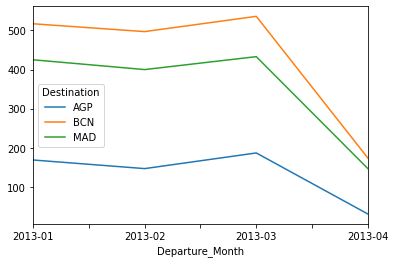

In [23]:
plotting_data.plot()

## Adjust the code to work with Big data
Lo vamos a hacer de nuevo con chunks

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

sample_searches = pd.read_csv('searches.csv.bz2', sep = '^', chunksize = 1000000)
some_chunks = []

for n_chunk, chunk in enumerate(sample_searches):
    print('Processing %d of size %d' %(n_chunk, len(chunk)))
          
    key_destinations = ['MAD', 'BCN', 'AGP']
    key_searches = chunk[chunk['Destination'].isin(key_destinations)]
    key_searches['Departure_Month'] = key_searches['Date'].str[:7]
    searches_per_month = key_searches.groupby(['Destination', 'Departure_Month'])['Date'].count()
    
    some_chunks.append(searches_per_month)

all_chunks = pd.concat(some_chunks)
all_results = all_chunks.groupby(['Destination', 'Departure_Month']).sum()
    
plotting_data = all_results.reset_index().pivot('Departure_Month', 'Destination', 'Date')   

/home/pipe11/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing 0 of size 1000000


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/pipe11/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing 1 of size 1000000
Processing 2 of size 1000000
Processing 3 of size 1000000
Processing 4 of size 1000000
Processing 5 of size 1000000
Processing 6 of size 1000000
Processing 7 of size 1000000
Processing 8 of size 1000000
Processing 9 of size 1000000
Processing 10 of size 1000000
Processing 11 of size 1000000
Processing 12 of size 1000000


/home/pipe11/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing 13 of size 1000000
Processing 14 of size 1000000
Processing 15 of size 1000000
Processing 16 of size 1000000
Processing 17 of size 1000000
Processing 18 of size 1000000
Processing 19 of size 1000000
Processing 20 of size 390198


In [62]:
plotting_data.head()

Destination,AGP,BCN,MAD
Departure_Month,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334


# Final Solution

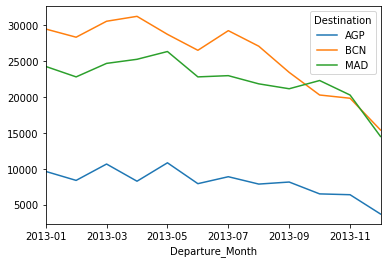

In [71]:
fig = plotting_data.plot()
plt.savefig('Nsearches arrival flights graphic.png')